# FIFA World Cup - Exploring Players, Countries, and World Cup Winners

In this notebook, I explore 3 data sets regarding matches, players, and World Cups. I am a soccer fan, so this is a great place for me to explore.

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# set datasets to separate pandas dataframes
worldCup = pd.read_csv("WorldCups.csv")
matches = pd.read_csv("WorldCupMatches.csv")
players = pd.read_csv("WorldCupPlayers.csv")

### Verify data was properly imported and we can get a sense of the data

In [7]:
# World Cup DF
worldCup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [4]:
# Matches DF
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [8]:
# Players DF
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [6]:
# notice in the world up dataset, there is Germany FR
# let's change this to 'Germany'

worldCup.replace(to_replace="Germany FR", value="Germany", inplace=True)

In [7]:
worldCup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607


### To get a sense of the data let's look at the goals scored over all world cups

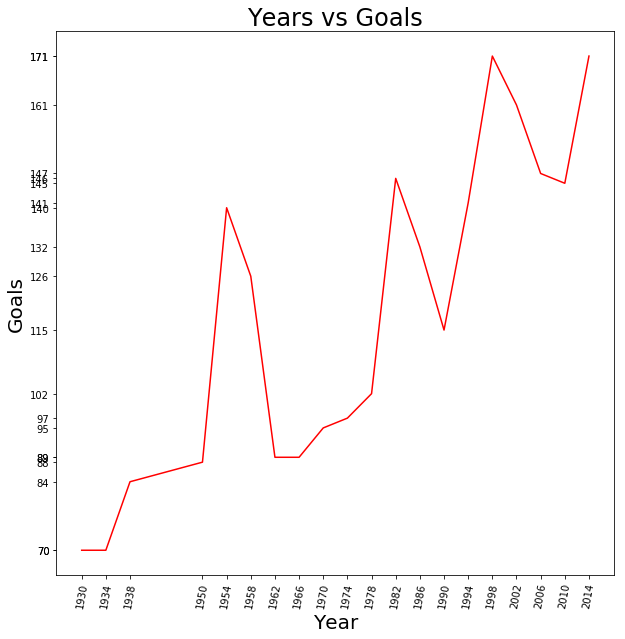

In [19]:
plt.figure(figsize=(10,10)) # generate a figure, with a figsize of 10x10 (tuple)
# set axis ticks
plt.xticks(worldCup["Year"], rotation='80')
plt.yticks(worldCup["GoalsScored"], rotation='horizontal')
# set axis labels and title
plt.xlabel("Year", fontsize=20)
plt.ylabel("Goals", fontsize=20)
plt.title("Years vs Goals", fontsize=24)
# now we plot
plt.plot(worldCup.Year, worldCup.GoalsScored, color="red")

### We really see an increase in goals over time

This could be because players really got amazing over time or that more and more countries were invited. I'm going to guess more the latter.

Why don't we check team participation.

Text(0.5,1,'Number of teams qualifying per year')

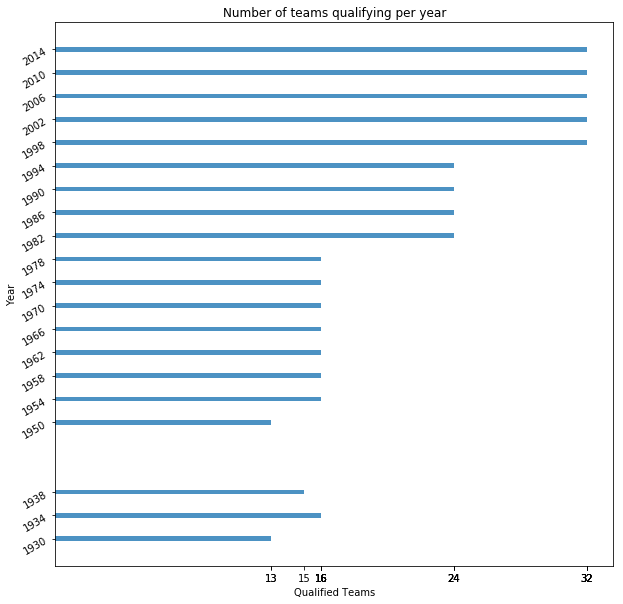

In [21]:
plt.figure(figsize=(10,10))
plt.barh(worldCup.Year, worldCup.QualifiedTeams, alpha=0.8)
plt.ylabel('Year')
plt.xlabel('Qualified Teams')
plt.yticks(worldCup["Year"], rotation=30)
plt.xticks(worldCup['QualifiedTeams'])
plt.title('Number of teams qualifying per year')

## Yes, indeed we see increased qualifiers during specific years: 
### - 1978-1982 

### - 1994-1998.

We also should note that we have no World Cups betwen 1938 and 1950, or at least no data.

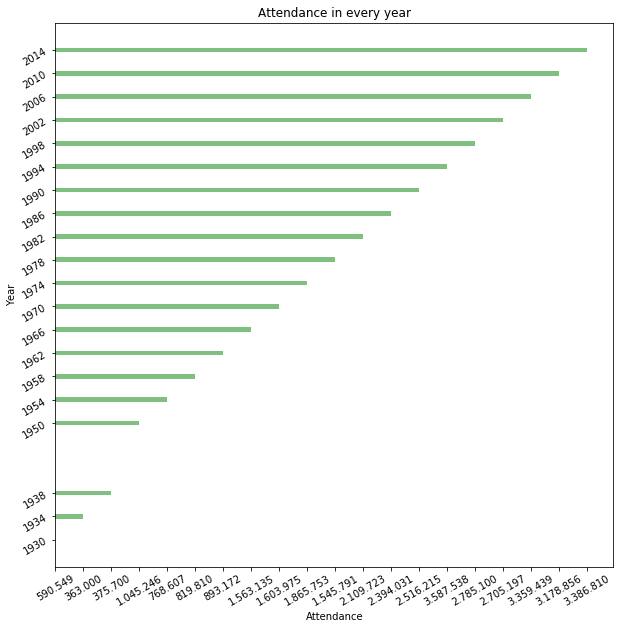

In [10]:
# let's check the attendance
plt.figure(figsize=(10, 10))
plt.barh(worldCup.Year,worldCup.Attendance,alpha=0.5,color='green') 
plt.ylabel('Year')
plt.xlabel('Attendance')
plt.yticks(worldCup.Year, rotation=30)
plt.xticks(worldCup.Attendance, rotation=30)
plt.title('Attendance in every year')
plt.show()

## Interesting, we see a pretty steady increase in attendance with each consecutive World Cup

Text(0.5,1,'MatchesPlayed')

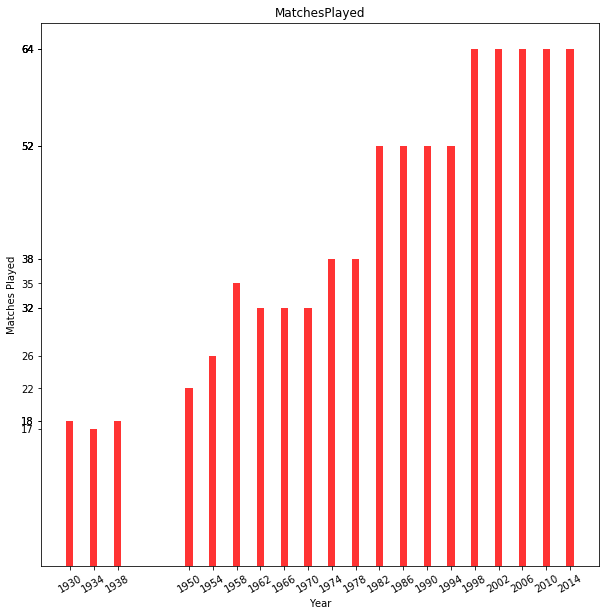

In [11]:
# matches played per year
plt.figure(figsize=(10,10))
plt.bar(worldCup.Year, worldCup.MatchesPlayed, width=1.2, alpha=0.8, color='red')
plt.xlabel('Year')
plt.ylabel('Matches Played')
plt.xticks(worldCup.Year, rotation=30)
plt.yticks(worldCup.MatchesPlayed)
plt.title("MatchesPlayed")

## We also see that the number of matches played increases with each World Cup

Note: We see the biggest increases at:
- 1978-1982
- 1994 -1998
Thus seeming to correlate with the increased number of qualifying teams. Makes sense, since as the number of qualifying teams increases, there will need to be more matches for the tournament.

In [12]:
worldCup['Year']
# same as
worldCup.Year

0     1930
1     1934
2     1938
3     1950
4     1954
5     1958
6     1962
7     1966
8     1970
9     1974
10    1978
11    1982
12    1986
13    1990
14    1994
15    1998
16    2002
17    2006
18    2010
19    2014
Name: Year, dtype: int64

In [13]:
winner = worldCup["Winner"].value_counts()[:]

In [14]:
runner_up = worldCup['Runners-Up'].value_counts()[:]

In [15]:
third_place = worldCup["Third"].value_counts()[:]

In [16]:
fourth_place = worldCup["Fourth"].value_counts()[:]

In [17]:
results = pd.concat([winner, runner_up, third_place, fourth_place], axis=1)

In [18]:
results

,Winner,Runners-Up,Third,Fourth
Argentina,2.0,3.0,NaN,NaN
Austria,NaN,NaN,1.0,1.0
Belgium,NaN,NaN,NaN,1.0
Brazil,5.0,2.0,2.0,2.0
Bulgaria,NaN,NaN,NaN,1.0
Chile,NaN,NaN,1.0,NaN
Croatia,NaN,NaN,1.0,NaN
Czechoslovakia,NaN,2.0,NaN,NaN
England,1.0,NaN,NaN,1.0
France,1.0,1.0,2.0,1.0


In [19]:
results = results.sort_values(by=['Winner', 'Runners-Up', 'Third', 'Fourth'], ascending=False)

In [20]:
results

,Winner,Runners-Up,Third,Fourth
Brazil,5.0,2.0,2.0,2.0
Germany,4.0,4.0,4.0,1.0
Italy,4.0,2.0,1.0,1.0
Argentina,2.0,3.0,NaN,NaN
Uruguay,2.0,NaN,NaN,3.0
France,1.0,1.0,2.0,1.0
England,1.0,NaN,NaN,1.0
Spain,1.0,NaN,NaN,1.0
Netherlands,NaN,3.0,1.0,1.0
Czechoslovakia,NaN,2.0,NaN,NaN


In [21]:
results = results.fillna(value=0)

In [22]:
results

,Winner,Runners-Up,Third,Fourth
Brazil,5.0,2.0,2.0,2.0
Germany,4.0,4.0,4.0,1.0
Italy,4.0,2.0,1.0,1.0
Argentina,2.0,3.0,0.0,0.0
Uruguay,2.0,0.0,0.0,3.0
France,1.0,1.0,2.0,1.0
England,1.0,0.0,0.0,1.0
Spain,1.0,0.0,0.0,1.0
Netherlands,0.0,3.0,1.0,1.0
Czechoslovakia,0.0,2.0,0.0,0.0


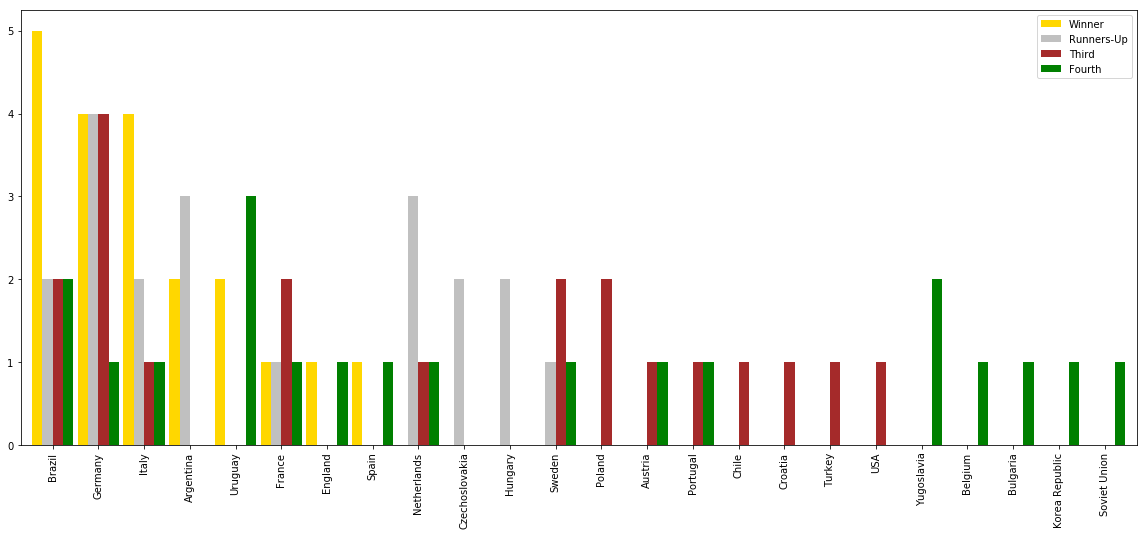

In [23]:
results.plot(y=["Winner", "Runners-Up", "Third", "Fourth"], kind="bar", color=['gold', 'silver', 'brown', 'green'], figsize=(20, 8), width=0.9)

In [24]:
from itertools import cycle, islice

In [25]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [26]:
home_team = matches['Home Team Name']

In [27]:
away_team = matches['Away Team Name']

In [28]:
home_team.value_counts()

Brazil                        82
Italy                         57
Argentina                     54
Germany FR                    43
England                       35
Germany                       34
Netherlands                   32
France                        31
Spain                         30
Uruguay                       28
Sweden                        27
Belgium                       18
Hungary                       18
Soviet Union                  18
Yugoslavia                    17
Mexico                        16
Poland                        16
Portugal                      16
USA                           15
Korea Republic                14
Chile                         14
Austria                       13
Switzerland                   12
Cameroon                      11
Paraguay                      11
Czechoslovakia                10
Japan                         10
Scotland                       9
Nigeria                        9
Romania                        9
          

In [29]:
matches.replace(to_replace="Germany FR", value="Germany", inplace=True)

In [30]:
home_team.value_counts()

Brazil                        82
Germany                       77
Italy                         57
Argentina                     54
England                       35
Netherlands                   32
France                        31
Spain                         30
Uruguay                       28
Sweden                        27
Hungary                       18
Soviet Union                  18
Belgium                       18
Yugoslavia                    17
Portugal                      16
Mexico                        16
Poland                        16
USA                           15
Chile                         14
Korea Republic                14
Austria                       13
Switzerland                   12
Cameroon                      11
Paraguay                      11
Czechoslovakia                10
Japan                         10
Scotland                       9
Nigeria                        9
Romania                        9
Colombia                       7
          

In [31]:
matches = matches.replace(to_replace='rn">', value ="", regex=True)

In [32]:
matches["Home Team Name"].value_counts()

Brazil                    82
Germany                   77
Italy                     57
Argentina                 54
England                   35
Netherlands               32
France                    31
Spain                     30
Uruguay                   28
Sweden                    27
Belgium                   18
Soviet Union              18
Hungary                   18
Yugoslavia                17
Mexico                    16
Poland                    16
Portugal                  16
USA                       15
Korea Republic            14
Chile                     14
Austria                   13
Switzerland               12
Paraguay                  11
Cameroon                  11
Czechoslovakia            10
Japan                     10
Romania                    9
Nigeria                    9
Scotland                   9
Bulgaria                   7
                          ..
Russia                     3
Slovenia                   3
Korea DPR                  3
German DR     

In [33]:
home_goals = matches.groupby(['Home Team Name'], as_index=False)[["Home Team Goals"]].sum()
home_goals

,Home Team Name,Home Team Goals
0,Algeria,5.0
1,Angola,0.0
2,Argentina,111.0
3,Australia,7.0
4,Austria,31.0
5,Belgium,27.0
6,Bolivia,1.0
7,Bosnia and Herzegovina,3.0
8,Brazil,180.0
9,Bulgaria,11.0


In [34]:
away_goals =matches.groupby(["Away Team Name"], as_index=False)[["Away Team Goals"]].sum()
away_goals

,Away Team Name,Away Team Goals
0,Algeria,9.0
1,Angola,1.0
2,Argentina,22.0
3,Australia,4.0
4,Austria,12.0
5,Belgium,27.0
6,Bolivia,0.0
7,Bosnia and Herzegovina,1.0
8,Brazil,45.0
9,Bulgaria,11.0


In [35]:
home_goals = home_goals.rename(index=str, columns={"Home Team Name": "country", "Home Team Goals" : "home_goals"})
home_goals

,country,home_goals
0,Algeria,5.0
1,Angola,0.0
2,Argentina,111.0
3,Australia,7.0
4,Austria,31.0
5,Belgium,27.0
6,Bolivia,1.0
7,Bosnia and Herzegovina,3.0
8,Brazil,180.0
9,Bulgaria,11.0


In [36]:
away_goals =away_goals.rename(index=str, columns={"Away Team Name": "country", "Away Team Goals": "away_goals"})
away_goals

,country,away_goals
0,Algeria,9.0
1,Angola,1.0
2,Argentina,22.0
3,Australia,4.0
4,Austria,12.0
5,Belgium,27.0
6,Bolivia,0.0
7,Bosnia and Herzegovina,1.0
8,Brazil,45.0
9,Bulgaria,11.0


In [37]:
goals = home_goals.merge(away_goals, left_on="country", right_on="country", how="outer")
goals

,country,home_goals,away_goals
0,Algeria,5.0,9.0
1,Angola,0.0,1.0
2,Argentina,111.0,22.0
3,Australia,7.0,4.0
4,Austria,31.0,12.0
5,Belgium,27.0,27.0
6,Bolivia,1.0,0.0
7,Bosnia and Herzegovina,3.0,1.0
8,Brazil,180.0,45.0
9,Bulgaria,11.0,11.0


In [38]:
goals = goals.fillna(value=0)
goals

,country,home_goals,away_goals
0,Algeria,5.0,9.0
1,Angola,0.0,1.0
2,Argentina,111.0,22.0
3,Australia,7.0,4.0
4,Austria,31.0,12.0
5,Belgium,27.0,27.0
6,Bolivia,1.0,0.0
7,Bosnia and Herzegovina,3.0,1.0
8,Brazil,180.0,45.0
9,Bulgaria,11.0,11.0


In [39]:
goals["total_goals"] = goals["home_goals"] + goals["away_goals"]
goals

,country,home_goals,away_goals,total_goals
0,Algeria,5.0,9.0,14.0
1,Angola,0.0,1.0,1.0
2,Argentina,111.0,22.0,133.0
3,Australia,7.0,4.0,11.0
4,Austria,31.0,12.0,43.0
5,Belgium,27.0,27.0,54.0
6,Bolivia,1.0,0.0,1.0
7,Bosnia and Herzegovina,3.0,1.0,4.0
8,Brazil,180.0,45.0,225.0
9,Bulgaria,11.0,11.0,22.0


In [40]:
goals = goals[goals.total_goals != 0]
goals

,country,home_goals,away_goals,total_goals
0,Algeria,5.0,9.0,14.0
1,Angola,0.0,1.0,1.0
2,Argentina,111.0,22.0,133.0
3,Australia,7.0,4.0,11.0
4,Austria,31.0,12.0,43.0
5,Belgium,27.0,27.0,54.0
6,Bolivia,1.0,0.0,1.0
7,Bosnia and Herzegovina,3.0,1.0,4.0
8,Brazil,180.0,45.0,225.0
9,Bulgaria,11.0,11.0,22.0


In [41]:
goals.sort_values(by=['total_goals'], ascending=False, inplace=True)
goals

,country,home_goals,away_goals,total_goals
26,Germany,168.0,67.0,235.0
8,Brazil,180.0,45.0,225.0
2,Argentina,111.0,22.0,133.0
35,Italy,99.0,29.0,128.0
24,France,68.0,40.0,108.0
63,Spain,50.0,42.0,92.0
42,Netherlands,51.0,40.0,91.0
31,Hungary,73.0,14.0,87.0
73,Uruguay,62.0,18.0,80.0
23,England,54.0,25.0,79.0


In [42]:
goals.reset_index(drop=True, inplace=True)
goals

,country,home_goals,away_goals,total_goals
0,Germany,168.0,67.0,235.0
1,Brazil,180.0,45.0,225.0
2,Argentina,111.0,22.0,133.0
3,Italy,99.0,29.0,128.0
4,France,68.0,40.0,108.0
5,Spain,50.0,42.0,92.0
6,Netherlands,51.0,40.0,91.0
7,Hungary,73.0,14.0,87.0
8,Uruguay,62.0,18.0,80.0
9,England,54.0,25.0,79.0


In [43]:
key = goals['country']
goals = goals.iloc[key.argsort()]

In [44]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(goals)))
my_colors

['b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r']

Text(0.5,1,'goals by country')

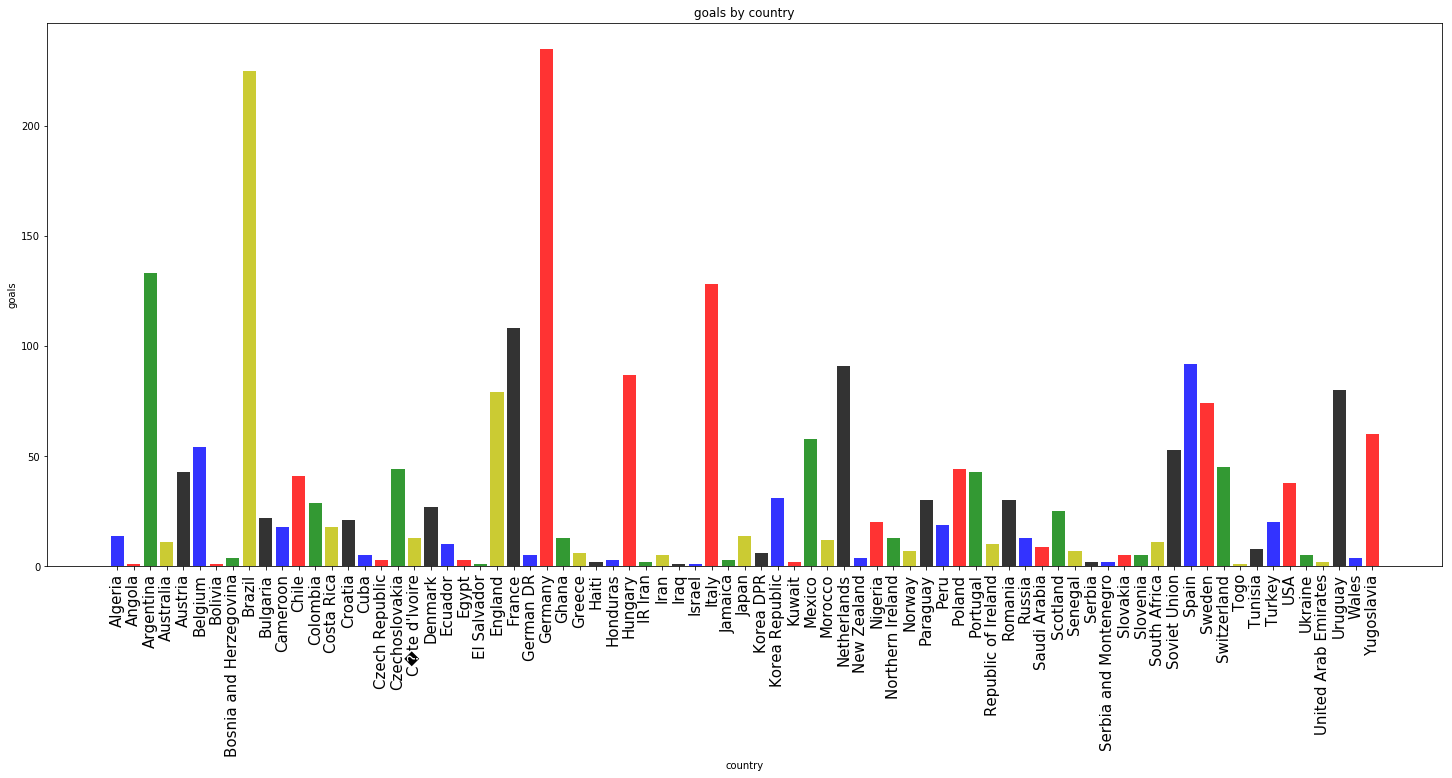

In [45]:
plt.figure(figsize=(25,10))
plt.bar(goals.country, goals.total_goals, alpha=0.8, color=my_colors)
plt.xlabel('country')
plt.ylabel("goals")
plt.xticks(goals.country, rotation=90, size=15)
plt.title('goals by country')

In [46]:
# word cloud
!pip install wordcloud


In [47]:
plt.figure(figsize=(15,15))
famous_players = players["Player Name"]

<Figure size 1080x1080 with 0 Axes>

In [48]:
famous_players

0               Alex THEPOT
1           Oscar BONFIGLIO
2          Marcel LANGILLER
3              Juan CARRENO
4           Ernest LIBERATI
5              Rafael GARZA
6           Andre MASCHINOT
7             Hilario LOPEZ
8           Etienne MATTLER
9            Dionisio MEJIA
10             Marcel PINEL
11             Felipe ROSAS
12          Alex VILLAPLANE
13             Manuel ROSAS
14           Lucien LAURENT
15                Jose RUIZ
16           Marcel CAPELLE
17          Alfredo SANCHEZ
18        Augustin CHANTREL
19           Efrain AMEZCUA
20           Edmond DELFOUR
21               Luis PEREZ
22          Celestin DELMER
23             Isidoro SOTA
24             Andre TASSIN
25             Jesus CASTRO
26            Nouma ANDOIRE
27          Felipe OLIVARES
28             Jean LAURENT
29       Raimundo RODRIGUEZ
                ...        
37754                 KROOS
37755            DEMICHELIS
37756               BOATENG
37757                  ROJO
37758               

In [49]:
famous_players = famous_players.str.replace(' ', '')
famous_players

0               AlexTHEPOT
1           OscarBONFIGLIO
2          MarcelLANGILLER
3              JuanCARRENO
4           ErnestLIBERATI
5              RafaelGARZA
6           AndreMASCHINOT
7             HilarioLOPEZ
8           EtienneMATTLER
9            DionisioMEJIA
10             MarcelPINEL
11             FelipeROSAS
12          AlexVILLAPLANE
13             ManuelROSAS
14           LucienLAURENT
15                JoseRUIZ
16           MarcelCAPELLE
17          AlfredoSANCHEZ
18        AugustinCHANTREL
19           EfrainAMEZCUA
20           EdmondDELFOUR
21               LuisPEREZ
22          CelestinDELMER
23             IsidoroSOTA
24             AndreTASSIN
25             JesusCASTRO
26            NoumaANDOIRE
27          FelipeOLIVARES
28             JeanLAURENT
29       RaimundoRODRIGUEZ
               ...        
37754                KROOS
37755           DEMICHELIS
37756              BOATENG
37757                 ROJO
37758               KRAMER
37759              LAVEZZI
3

In [50]:
counts =famous_players.value_counts().to_dict()

In [51]:
counts

{'RONALDO': 33,
 'KLOSE': 32,
 'M�LLER': 28,
 'OSCAR': 28,
 'JULIOCESAR': 26,
 'CAFU': 26,
 'DIDA': 25,
 'SILVA': 25,
 'SCHWEINSTEIGER': 25,
 'LEAO': 25,
 'SeppMAIER': 25,
 'PODOLSKI': 25,
 'LAHM': 25,
 'MERTESACKER': 25,
 'WladyslawZMUDA': 24,
 'DinoZOFF': 23,
 'DiegoMARADONA': 23,
 'GiuseppeBERGOMI': 23,
 'UweSEELER': 22,
 'Karl-HeinzSCHNELLINGER': 22,
 'SNEIJDER': 22,
 'KUYT': 22,
 'ROBBEN': 22,
 'V.PERSIE': 22,
 'PEPE': 22,
 'CASTILHO': 21,
 'LotharMATTHAEUS': 21,
 'PEL�(EdsonArantesdoNascimento)': 21,
 'FrancoBARESI': 21,
 'PEREZ': 21,
 'NILTONSANTOS': 21,
 'MESSI': 21,
 'RAMOS': 21,
 'MASCHERANO': 21,
 'ROMERO': 21,
 'JAMES': 21,
 'PierreLITTBARSKI': 21,
 'Karl-HeinzRUMMENIGGE': 20,
 'RIVELINO': 20,
 'MarekKUSTO': 20,
 'EDU': 20,
 'GOMEZ': 20,
 'JONES': 20,
 'AndrzejSZARMACH': 20,
 'GrzegorzLATO': 20,
 'TORRES': 19,
 'BUTT': 19,
 'DanielPASSARELLA': 19,
 'RudiVOELLER': 19,
 'LevYASHIN': 19,
 'XAVI': 19,
 'JulioOLARTICOECHEA': 19,
 'WolfgangOVERATH': 19,
 'ThomasBERTHOLD': 19,
 'N

In [52]:
import wordcloud
wordcloud = wordcloud.WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40 
                         ).generate_from_frequencies(counts)

ModuleNotFoundError: No module named 'wordcloud'

In [55]:
matches.rename(columns={'Home Team Name': 'HomeTeamName', 'Away Team Name': 'AwayTeamName'}, inplace=True)

In [56]:
teams = ['Belgium', 'England']

In [57]:
belVsEng = matches.loc[matches.HomeTeamName.isin(teams)|matches.AwayTeamName.isin(teams)]

In [59]:
England_faceoff = belVsEng.loc[(belVsEng['HomeTeamName']=='England')|(belVsEng['AwayTeamName']=='England')]

['1930.0' '1934.0' '1938.0' '1950.0' '1954.0' '1958.0' '1962.0' '1966.0'
 '1970.0' '1982.0' '1986.0' '1990.0' '1994.0' '1998.0' '2002.0' '2006.0'
 '2010.0' '2014.0']


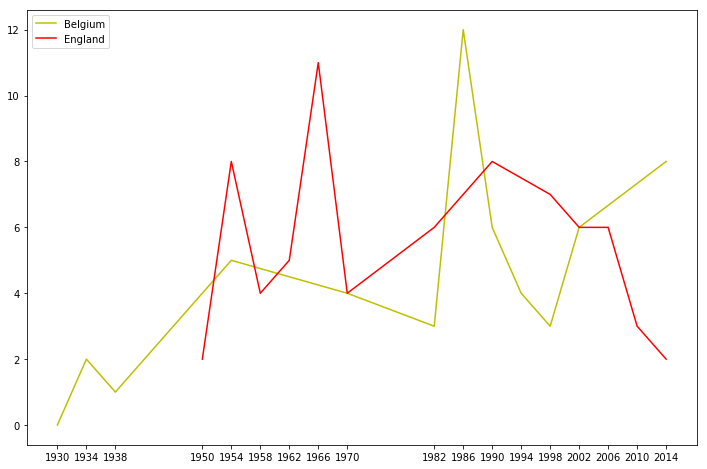

In [61]:
for i in England_faceoff.index:
    if England_faceoff.at[i, 'HomeTeamName']=='England':
        England_faceoff.at[i, 'goals'] = England_faceoff.at[i, 'Home Team Goals']
        England_faceoff.at[i, 'country'] = England_faceoff.at[i, 'HomeTeamName']
    else:
        England_faceoff.at[i, 'goals'] = England_faceoff.at[i, 'Away Team Goals']
        England_faceoff.at[i, 'country'] = England_faceoff.at[i, 'AwayTeamName']
        
England_faceoff = England_faceoff.reset_index()

England_faceoff_goals=pd.DataFrame()
England_faceoff_goals=England_faceoff[['Year', 'country', 'goals']]
England_faceoff_goals
England_faceoff_Yeargoals = England_faceoff_goals.groupby(['Year','country'], as_index=False).sum()



### Same for Belgium:

Belgium_faceoff = belVsEng.loc[(belVsEng['HomeTeamName']=='Belgium')| (belVsEng['AwayTeamName']=='Belgium')]
for i in Belgium_faceoff.index:
    if Belgium_faceoff.at[i,'HomeTeamName']=='Belgium':
        Belgium_faceoff.at[i, 'goals'] = Belgium_faceoff.at[i,'Home Team Goals']
        Belgium_faceoff.at[i, 'country'] = Belgium_faceoff.at[i,'HomeTeamName']
    else:
        Belgium_faceoff.at[i, 'goals'] = Belgium_faceoff.at[i,'Away Team Goals']
        Belgium_faceoff.at[i, 'country'] = Belgium_faceoff.at[i,'AwayTeamName']

Belgium_faceoff =Belgium_faceoff.reset_index()


Belgium_faceoff_goals=pd.DataFrame()
Belgium_faceoff_goals=Belgium_faceoff[['Year','country','goals']]
Belgium_faceoff_goals.reset_index()
Belgium_faceoff_Yeargoals = Belgium_faceoff_goals.groupby(['Year','country'], as_index=False).sum()



years=[]
years1 =Belgium_faceoff_Yeargoals.Year
years2 =England_faceoff_Yeargoals.Year
years = years1.append(years2)

years_array = pd.Series(years).values
years_array = np.unique(years_array)

years_array_string = years_array.astype(np.str)
print(years_array_string)

plt.figure(figsize=(12, 8))
plt.plot(Belgium_faceoff_Yeargoals.Year, Belgium_faceoff_Yeargoals.goals, '-y', label='Belgium')
plt.plot(England_faceoff_Yeargoals.Year, England_faceoff_Yeargoals.goals,'-r', label='England')
plt.legend(loc='upper left')
plt.xticks(years_array)
plt.show()

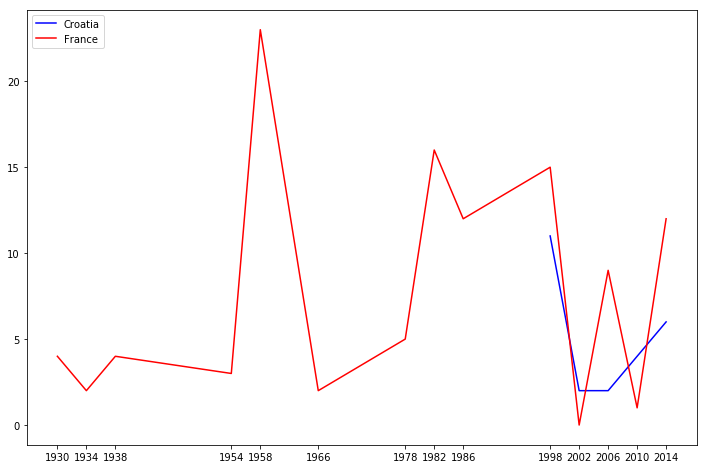

In [62]:
matches.rename(columns={'Home Team Name': 'HomeTeamName', 'Away Team Name': 'AwayTeamName'}, inplace=True)
teams = ['France','Croatia']
franvsCro = matches.loc[matches.HomeTeamName.isin(teams) | matches.AwayTeamName.isin(teams)]

France_faceoff = franvsCro.loc[(franvsCro['HomeTeamName']=='France')| (franvsCro['AwayTeamName']=='France')]




for i in France_faceoff.index:
    if France_faceoff.at[i,'HomeTeamName']=='France':
        France_faceoff.at[i, 'goals'] = France_faceoff.at[i,'Home Team Goals']
        France_faceoff.at[i, 'country'] = France_faceoff.at[i,'HomeTeamName']
    else:
        France_faceoff.at[i, 'goals'] = France_faceoff.at[i,'Away Team Goals']
        France_faceoff.at[i, 'country'] = France_faceoff.at[i,'AwayTeamName']

France_faceoff =France_faceoff.reset_index()


France_faceoff_goals=pd.DataFrame()
France_faceoff_goals=France_faceoff[['Year','country','goals']]
##France_faceoff_goals
France_faceoff_Yeargoals = France_faceoff_goals.groupby(['Year','country'], as_index=False).sum()


### Same for Croatia:

Croatia_faceoff = franvsCro.loc[(franvsCro['HomeTeamName']=='Croatia')| (franvsCro['AwayTeamName']=='Croatia')]
for i in Croatia_faceoff.index:
    if Croatia_faceoff.at[i,'HomeTeamName']=='Croatia':
        Croatia_faceoff.at[i, 'goals'] = Croatia_faceoff.at[i,'Home Team Goals']
        Croatia_faceoff.at[i, 'country'] = Croatia_faceoff.at[i,'HomeTeamName']
    else:
        Croatia_faceoff.at[i, 'goals'] = Croatia_faceoff.at[i,'Away Team Goals']
        Croatia_faceoff.at[i, 'country'] = Croatia_faceoff.at[i,'AwayTeamName']

Croatia_faceoff =Croatia_faceoff.reset_index()


Croatia_faceoff_goals=pd.DataFrame()

Croatia_faceoff_goals=Croatia_faceoff[['Year','country','goals']]
Croatia_faceoff_goals.reset_index()
Croatia_faceoff_Yeargoals = Croatia_faceoff_goals.groupby(['Year','country'], as_index=False).sum()

#print(Croatia_faceoff_goals)

years=[]
years1 =France_faceoff_Yeargoals.Year
years2 =Croatia_faceoff_Yeargoals.Year
years = years1.append(years2)

years_array = pd.Series(years).values
years_array = np.unique(years_array)

years_array_string = years_array.astype(np.str)
#print(years_array_string)

plt.figure(figsize=(12, 8))
plt.plot(Croatia_faceoff_Yeargoals.Year, Croatia_faceoff_Yeargoals.goals, '-b', label='Croatia')
plt.plot(France_faceoff_Yeargoals.Year, France_faceoff_Yeargoals.goals,'-r', label='France')
plt.legend(loc='upper left')
plt.xticks(years_array)
plt.show()